### Analysis Problem
What correlations exist between an individual's music taste and their self-reported mental health?

### Variable Description
Timestamp := date and time when form was submitted

Age := respondent's age

Primary Streaming Service := respondent's primary streaming service (Spotify, YouTube music, Pandora, Other)

Hours Per Day := number of hours the respondent listens to music per day

While working := Does the respondent listen to music while studying/working?

Instrumentalist := Does the respondent play an instrument regularly?

Composer := Does the respondent compose music?

Fav genre := Respondent's favorite or top genre

Exploratory := Does the respondent actively explore new artists/genres?

Foreign languages := Does the respondent regularly listen to music with lyrics in a language they are not fluent in?

Frequency [genre] := how often respondent listens to given genre

Anxiety

Depression

Insomnia

OCD

Music effects := does music help/effect mental health?

### Data Understanding

In [92]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [93]:
df = pd.read_csv('mxmh_survey_results.csv')

In [94]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [96]:
df.shape

(736, 33)

In [97]:
df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [98]:
df['Primary streaming service'].unique()

array(['Spotify', 'Pandora', 'YouTube Music',
       'I do not use a streaming service.', 'Apple Music',
       'Other streaming service', nan], dtype=object)

In [99]:
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [100]:
# Average age is 25; anxiety is highest mean indicator, OCD the lowest. Average hours per day is 3.5. 

### Data Cleaning

In [101]:
df.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [102]:
clean_df = df.dropna()
clean_df.isnull().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

In [103]:
clean_df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


### Data Visualization

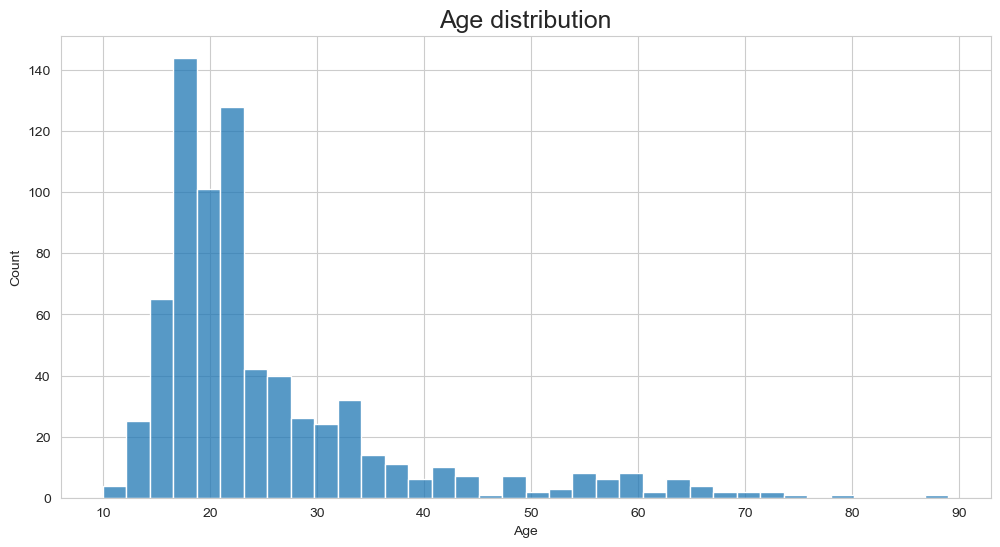

In [104]:
plt.figure(figsize=(12,6))
sns.histplot(df['Age'])
plt.title('Age distribution', size=18)
plt.xlabel('Age', size=10)
plt.ylabel('Count', size=10)
plt.show()

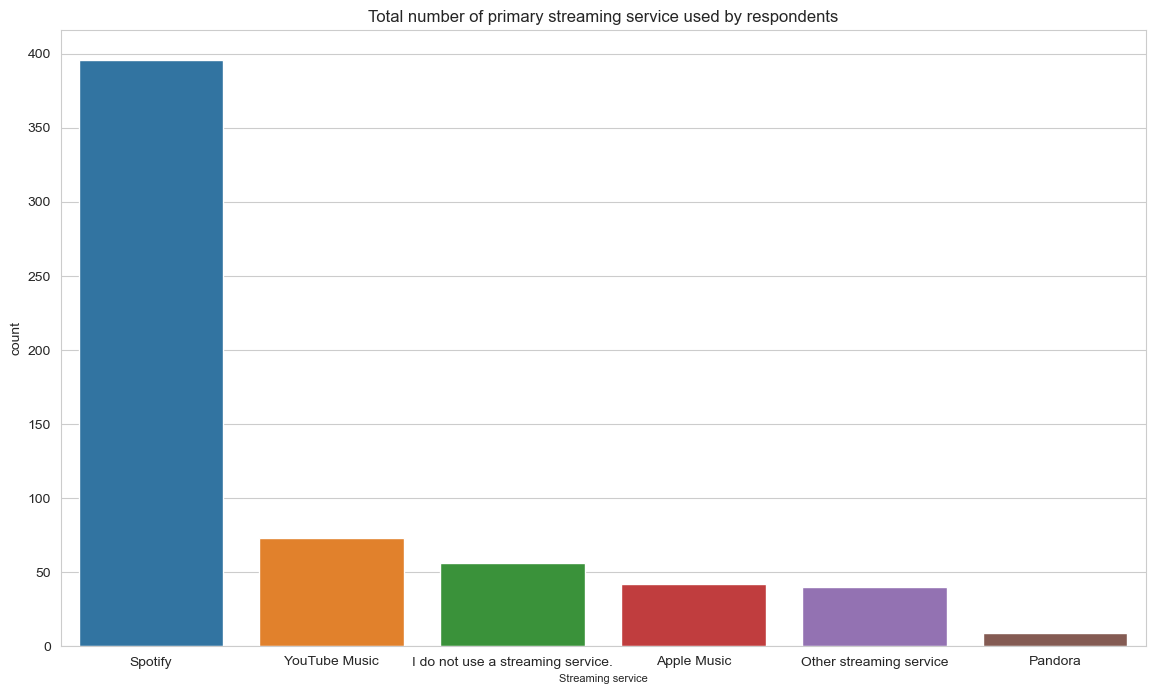

In [105]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'Primary streaming service', data = clean_df)
plt.title('Total number of primary streaming service used by respondents',size=12)
plt.xlabel('Streaming service', size = 8)
plt.show()

In [106]:
high_anxiety = clean_df[clean_df['Anxiety'] >= 7]

In [107]:
high_anxiety

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
16,8/27/2022 23:39:41,16.0,Spotify,8.0,Yes,No,No,Hip hop,Yes,Yes,...,Sometimes,Very frequently,Never,Rarely,8.0,8.0,4.0,3.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,10/22/2022 15:20:29,13.0,Spotify,1.0,Yes,No,No,Video game music,Yes,No,...,Never,Sometimes,Sometimes,Very frequently,10.0,10.0,8.0,4.0,Worsen,I understand.
726,10/23/2022 20:50:27,18.0,Apple Music,18.0,Yes,No,No,EDM,Yes,No,...,Sometimes,Sometimes,Sometimes,Sometimes,9.0,8.0,5.0,10.0,Improve,I understand.
728,10/30/2022 7:24:08,14.0,Other streaming service,7.0,Yes,Yes,No,Country,Yes,No,...,Sometimes,Sometimes,Very frequently,Rarely,7.0,3.0,1.0,2.0,Improve,I understand.
730,10/30/2022 13:15:26,21.0,Spotify,2.0,Yes,No,No,R&B,Yes,Yes,...,Very frequently,Sometimes,Sometimes,Sometimes,7.0,6.0,4.0,6.0,Improve,I understand.


In [108]:
high_anxiety.value_counts('Frequency [Country]','Anxiety')

Frequency [Country]
Never              0.470199
Rarely             0.304636
Sometimes          0.155629
Very frequently    0.069536
Name: proportion, dtype: float64

### ~47% of respondents who self-report as highly anxious never listen to country music.

<Axes: xlabel='Frequency [Country]'>

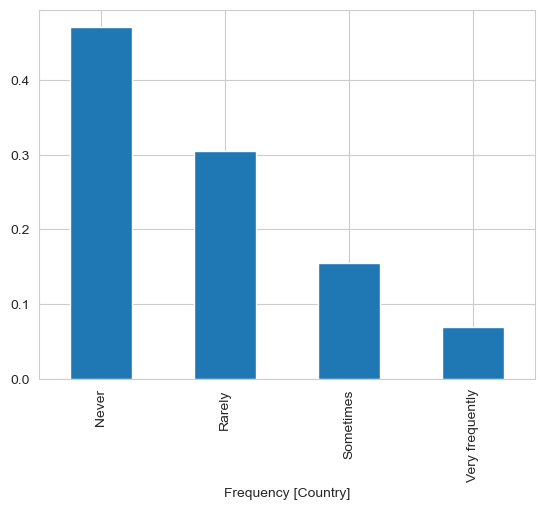

In [109]:
high_anxiety.value_counts('Frequency [Country]','Anxiety').plot.bar()

In [110]:
high_anxiety.value_counts('Frequency [Gospel]','Anxiety')

Frequency [Gospel]
Never              0.725166
Rarely             0.211921
Sometimes          0.052980
Very frequently    0.009934
Name: proportion, dtype: float64

<Axes: xlabel='Frequency [Gospel]'>

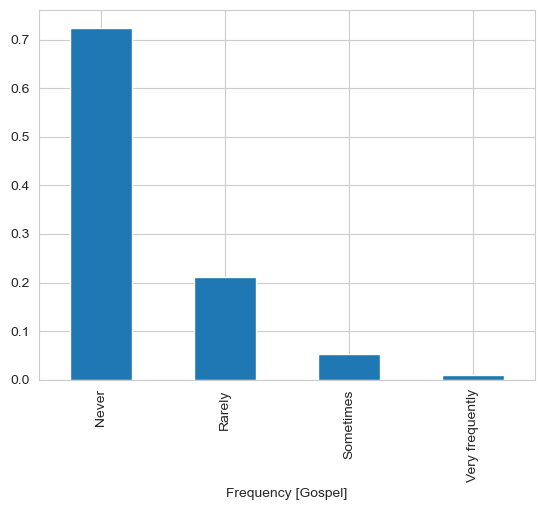

In [111]:
high_anxiety.value_counts('Frequency [Gospel]','Anxiety').plot.bar()

### Less than 1% of respondents who self-report as highly anxious very frequently listen to gospel, whereas ~73% of those who are highly anxious never listen to gospel.  (religious background the reason?)

In [112]:
high_anxiety.value_counts('Frequency [K pop]','Anxiety')

Frequency [K pop]
Never              0.559603
Rarely             0.235099
Very frequently    0.125828
Sometimes          0.079470
Name: proportion, dtype: float64

### 55% of those who are highly anxious never listen to K pop.

In [113]:
high_anxiety.value_counts('Frequency [Latin]','Anxiety')

Frequency [Latin]
Never              0.615894
Rarely             0.198675
Sometimes          0.135762
Very frequently    0.049669
Name: proportion, dtype: float64

### 61% of those who are highly anxious never listen to Latin music.

In [114]:
high_depression = clean_df[clean_df['Depression'] >= 7]

### 71% of those who are highly depressed never listen to gospel

In [121]:
high_depression.value_counts('Frequency [Gospel]','Depression')

Frequency [Gospel]
Never              0.718894
Rarely             0.221198
Sometimes          0.055300
Very frequently    0.004608
Name: proportion, dtype: float64

<Axes: xlabel='Frequency [Gospel]'>

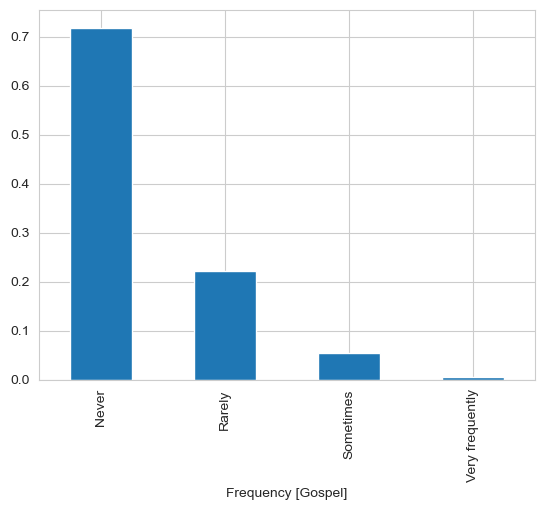

In [122]:
high_depression.value_counts('Frequency [Gospel]','Depression').plot.bar()

### 53% of those who are highly depressed never listen to K pop

<Axes: xlabel='Frequency [K pop]'>

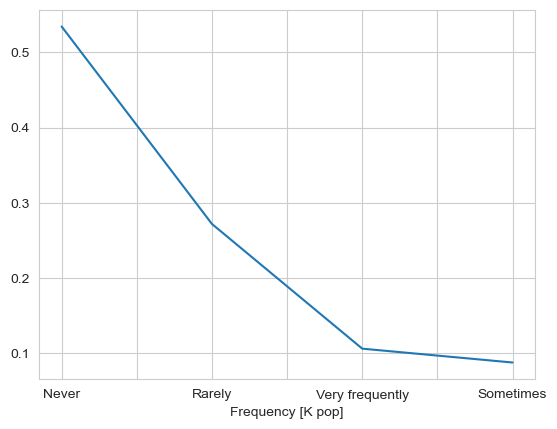

In [128]:
high_depression.value_counts('Frequency [K pop]','Depression').plot()

### 56% of those who are highly depressed never listen to Latin

<Axes: xlabel='Frequency [Latin]'>

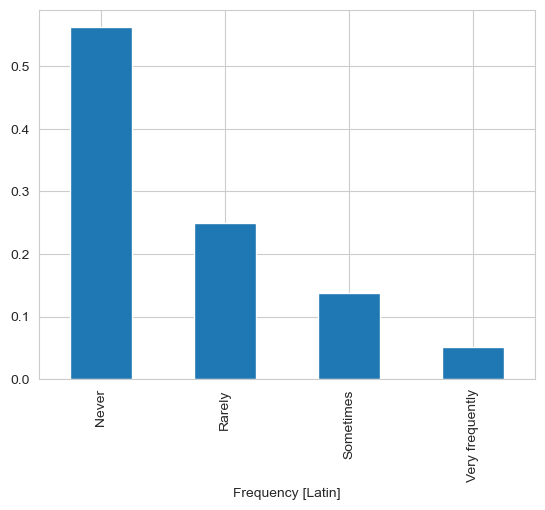

In [131]:
high_depression.value_counts('Frequency [Latin]','Depression').plot.bar()

In [139]:
high_insomnia = clean_df[clean_df['Insomnia'] >= 7]

### 67% of those who are high insomniac never listen to Gospel

<Axes: xlabel='Frequency [Gospel]'>

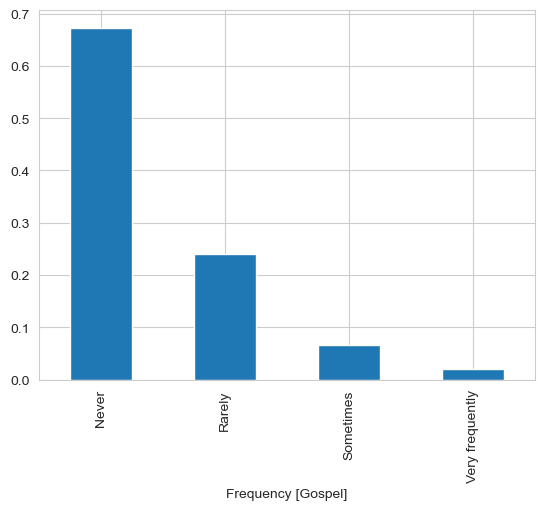

In [148]:
high_insomnia.value_counts('Frequency [Gospel]','Insomnia').plot.bar()

### 54% of those who are high insomniac never listen to K pop

<Axes: xlabel='Frequency [K pop]'>

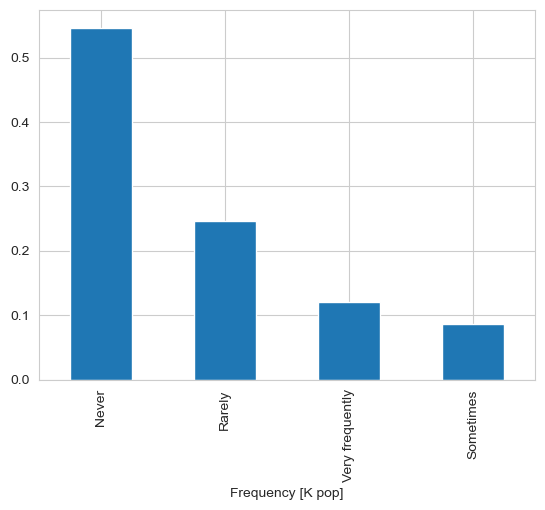

In [149]:
high_insomnia.value_counts('Frequency [K pop]','Insomnia').plot.bar()

In [158]:
high_ocd = clean_df[clean_df['OCD'] >= 7]

### 69% of those who are high OCD never listen to gospel

<Axes: xlabel='Frequency [Gospel]'>

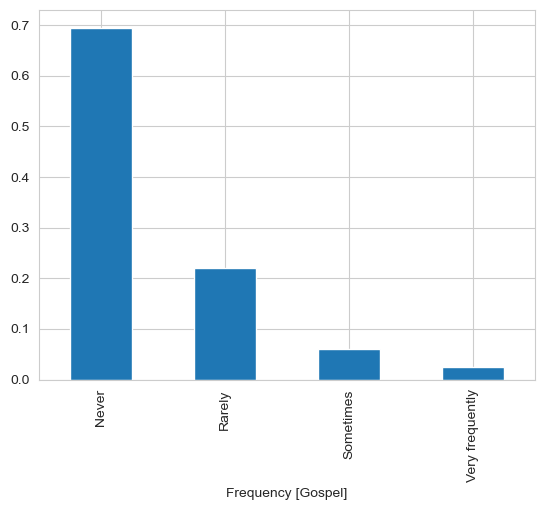

In [164]:
high_ocd.value_counts('Frequency [Gospel]','OCD').plot.bar()

### 58% of those who are high OCD have never listened to Latin

In [169]:
high_ocd.value_counts('Frequency [Latin]','OCD')

Frequency [Latin]
Never              0.585366
Rarely             0.231707
Sometimes          0.121951
Very frequently    0.060976
Name: proportion, dtype: float64

### 51% of those who are OCD very frequently listen to rock

In [174]:
high_ocd.value_counts('Frequency [Rock]','OCD')

Frequency [Rock]
Very frequently    0.512195
Sometimes          0.207317
Never              0.158537
Rarely             0.121951
Name: proportion, dtype: float64

## Initial Conclusions
It seems there is a strong relationship between never listening to Gospel and Latin and higher levels of anxiety, depression, insomnia, and/or OCD. Could this be a factor of age?  Could this be a factor of religious affiliation and/or perceived effects of music on ones health? 